In [1]:
# This is query for the Miners Distance template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/miner_dist/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [18]:
frame.iloc[0:8,:]

,id,distances,year_week,norm_balance
0,13505,4,20191,6.479437e-10
1,14257,5,20191,1.369859e-06
2,15000,3,20191,8.975931e-03
3,16767,2,20191,1.328760e-07
4,16832,4,20191,2.821376e-05
5,22144,2,20191,1.296344e-09
6,32292,5,20191,3.652955e-07
7,37684,1,20191,1.439377e-05


In [112]:
start = 0
end = 8 

mean = frame.groupby('distances')['norm_balance'].mean()[start:end]
std = frame.groupby('distances')['norm_balance'].std()[start:end]
p025 = frame.groupby('distances')['norm_balance'].quantile(0.025)[start:end]
p975 = frame.groupby('distances')['norm_balance'].quantile(0.975)[start:end]

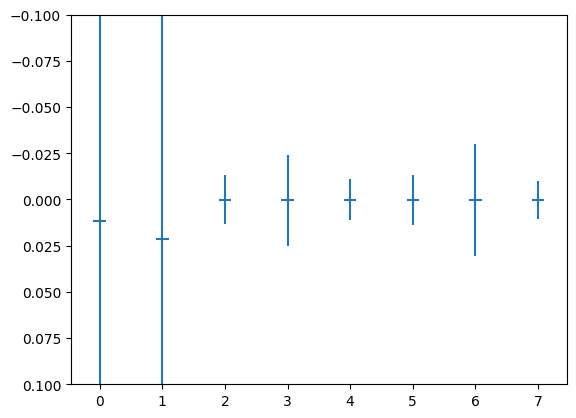

In [116]:
from cmath import log
import numpy as np

plt.errorbar(
    mean.index,
    mean,
    xerr=0.1,
    # yerr= [mean - p025, p975 - mean],
    # yerr=[np.log(1+(mean-p025)), np.log(1+(p975-mean))],
    yerr = std*2,
    linestyle='',
)
plt.ylim([0.1,-0.1])
plt.show()
